In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1. histogram of the number of gene sets per lib_name

In [64]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 9967 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [65]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [66]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"            "Reactome_2022"             
[3] "WikiPathway_2023_Human"     "GO_Biological_Process_2023"
[5] "GO_Molecular_Function_2023" "GO_Cellular_Component_2023"

In [67]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

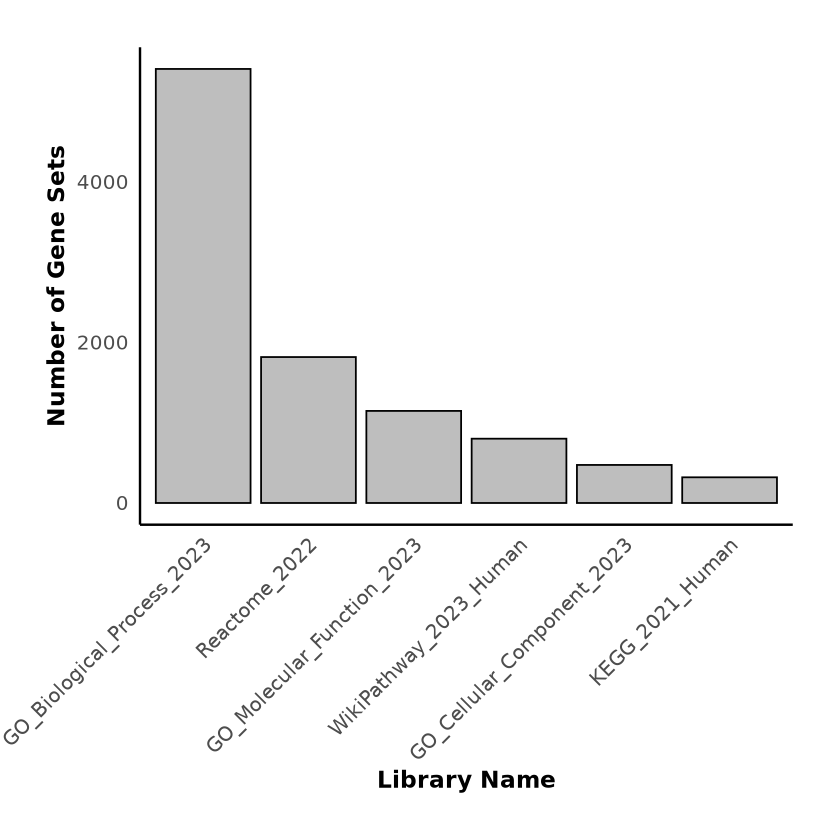

In [68]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [47]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# 2. histogram of the number of genes in each gene set for each library

In [7]:
# Create the histogram for the number of genes in each gene set for each library
p <- ggplot(geneset_sz, aes(x = num_genes, fill = lib_name)) +
  geom_histogram(bins = 50, color = "black", alpha = 0.7, position = "identity") +
  facet_wrap(~ lib_name, scales = "free") +
  xlab("Number of Genes in Gene Set") +
  ylab("Frequency") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm") # Top, right, bottom, left margins
  )


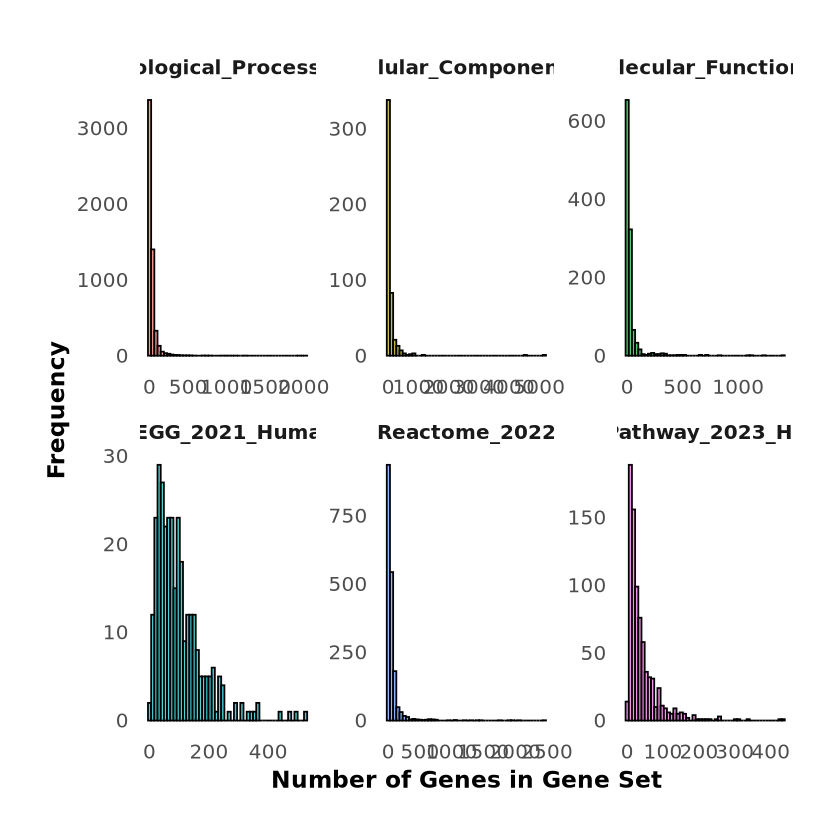

In [8]:
p

In [81]:
ggsave("figures/2_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 15, height = 8, dpi = 300)

# 3.  boxplot of the number of genes in each gene set for each library

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


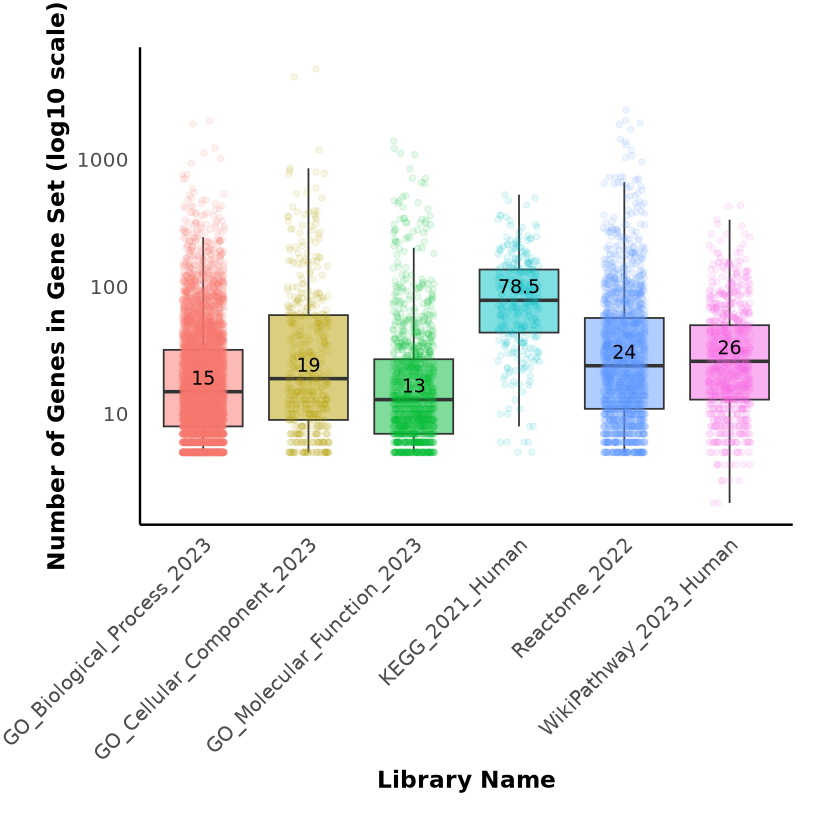

In [69]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [70]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# 4. Percentage of significant gene sets

In [71]:
df = readr::read_tsv("genes_overlap.tsv")

Rows: 19934 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): database, model, descr
dbl (8): ncurated, nllm, ninter, ndup, generatio, bgratio, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
head(df)

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.9230769,0.002267459,4.938589e-32,1.580348e-29
KEGG_2021_Human,gpt-3.5-turbo-0125,AGE-RAGE signaling pathway in diabetic complications,100,35,7,0,0.2000000,0.005038799,4.133373e-10,1.322679e-07
KEGG_2021_Human,gpt-3.5-turbo-0125,AMPK signaling pathway,120,27,14,0,0.5185185,0.006046559,8.155356e-25,2.609714e-22
KEGG_2021_Human,gpt-3.5-turbo-0125,Acute myeloid leukemia,67,11,6,0,0.5454545,0.003375995,5.475707e-13,1.752226e-10
KEGG_2021_Human,gpt-3.5-turbo-0125,Adherens junction,71,19,13,0,0.6842105,0.003577547,1.371074e-28,4.387436e-26
KEGG_2021_Human,gpt-3.5-turbo-0125,Adipocytokine signaling pathway,69,29,17,0,0.5862069,0.003476771,9.933004e-36,3.178561e-33


In [73]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

`summarise()` has grouped output by 'database'. You can override using the
`.groups` argument.


In [74]:
percentage_df

database,model,percentage
<chr>,<chr>,<dbl>
GO_Biological_Process_2023,gpt-3.5-turbo-0125,29.42482
GO_Biological_Process_2023,gpt-4o-2024-05-13,41.53875
GO_Cellular_Component_2023,gpt-3.5-turbo-0125,57.59494
GO_Cellular_Component_2023,gpt-4o-2024-05-13,73.62869
GO_Molecular_Function_2023,gpt-3.5-turbo-0125,51.35135
GO_Molecular_Function_2023,gpt-4o-2024-05-13,67.82912
KEGG_2021_Human,gpt-3.5-turbo-0125,89.37500
KEGG_2021_Human,gpt-4o-2024-05-13,93.12500
Reactome_2022,gpt-3.5-turbo-0125,65.23652


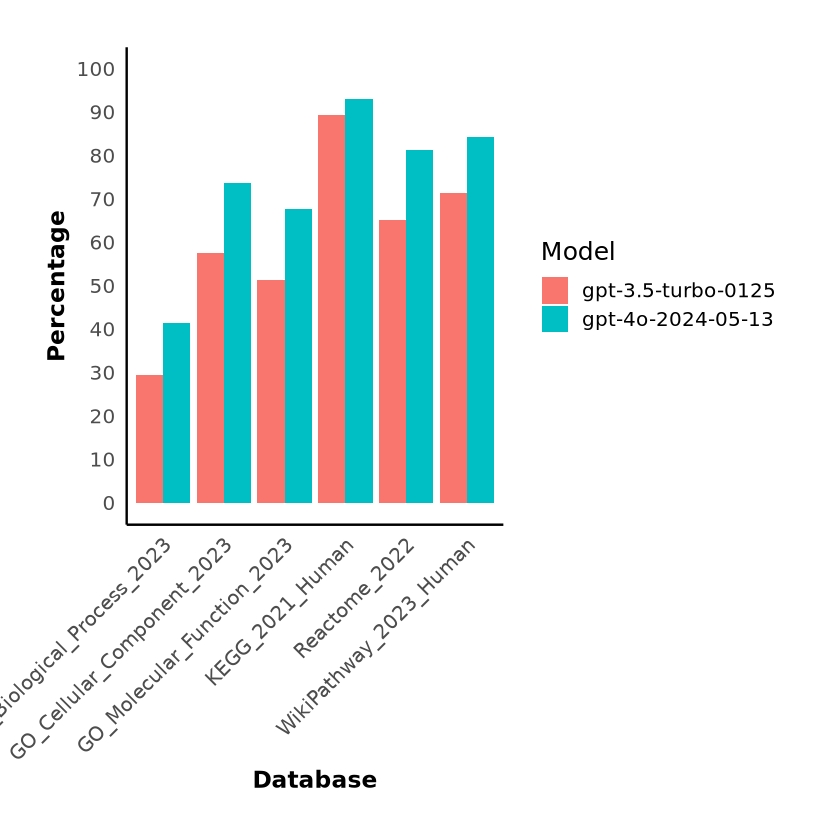

In [75]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [76]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

# 5. -log10(p-values) get bigger (e.g. p-values get smaller) for gpt-4o versus gpt-3.5 for the same pathway/bp across all the databases.

In [143]:
df = readr::read_tsv("genes_overlap.tsv")

Rows: 19934 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): database, model, descr
dbl (8): ncurated, nllm, ninter, ndup, generatio, bgratio, p_val, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [144]:
# log transform
df <- df %>%
    mutate(log_p = -log10(p_val))

In [145]:
head(df,3)

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj,log_p
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.9230769,0.002267459,4.938589e-32,1.580348e-29,31.306397
KEGG_2021_Human,gpt-3.5-turbo-0125,AGE-RAGE signaling pathway in diabetic complications,100,35,7,0,0.2000000,0.005038799,4.133373e-10,1.322679e-07,9.383695
KEGG_2021_Human,gpt-3.5-turbo-0125,AMPK signaling pathway,120,27,14,0,0.5185185,0.006046559,8.155356e-25,2.609714e-22,24.088557


In [147]:
df[df$descr=='ABC transporters',]

database,model,descr,ncurated,nllm,ninter,ndup,generatio,bgratio,p_val,p_val_adj,log_p
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KEGG_2021_Human,gpt-3.5-turbo-0125,ABC transporters,45,13,12,0,0.9230769,0.002267459,4.938589e-32,1.580348e-29,31.3064
KEGG_2021_Human,gpt-4o-2024-05-13,ABC transporters,45,43,37,0,0.8604651,0.002267459,1.965776e-101,6.290484e-99,100.7065


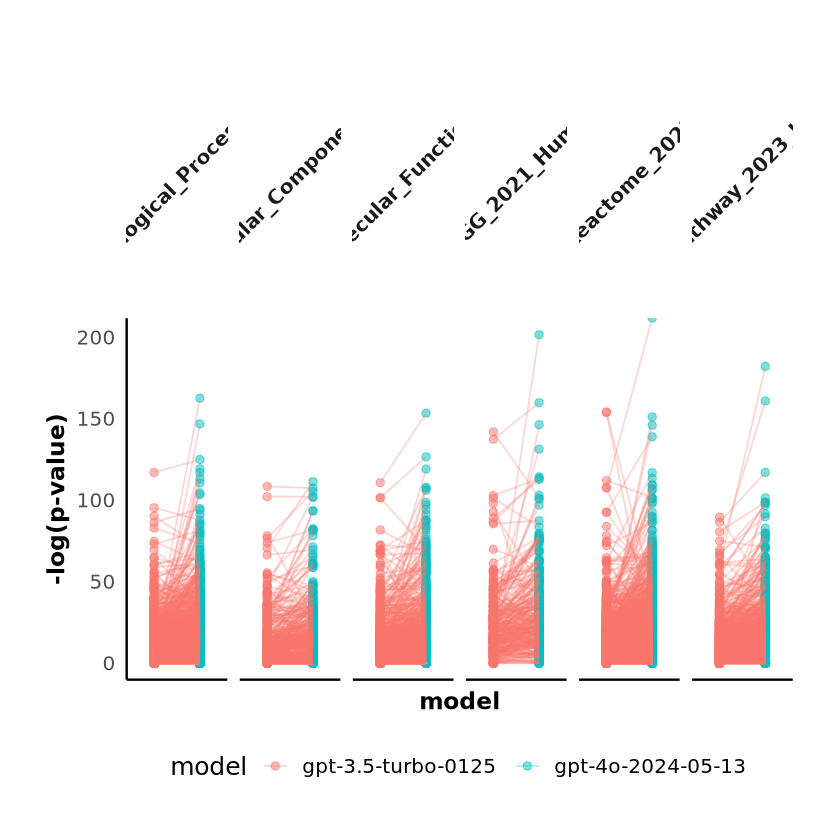

In [90]:
# Plotting code
p <- ggplot(df, aes(x = model, y = log_p, group = descr, color=model)) +
  geom_point(size = 2, alpha = 0.5) +
  geom_line(alpha = 0.3, linewidth = 0.5) +
  labs(
       y = "-log(p-value)") +
  facet_wrap(~database, nrow = 1) +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_blank(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12,angle = 45),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [91]:
ggsave("figures/5_logp_compare_models.pdf", plot = p, device = "pdf", width = 15, height = 10, dpi = 300)

In [179]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [180]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


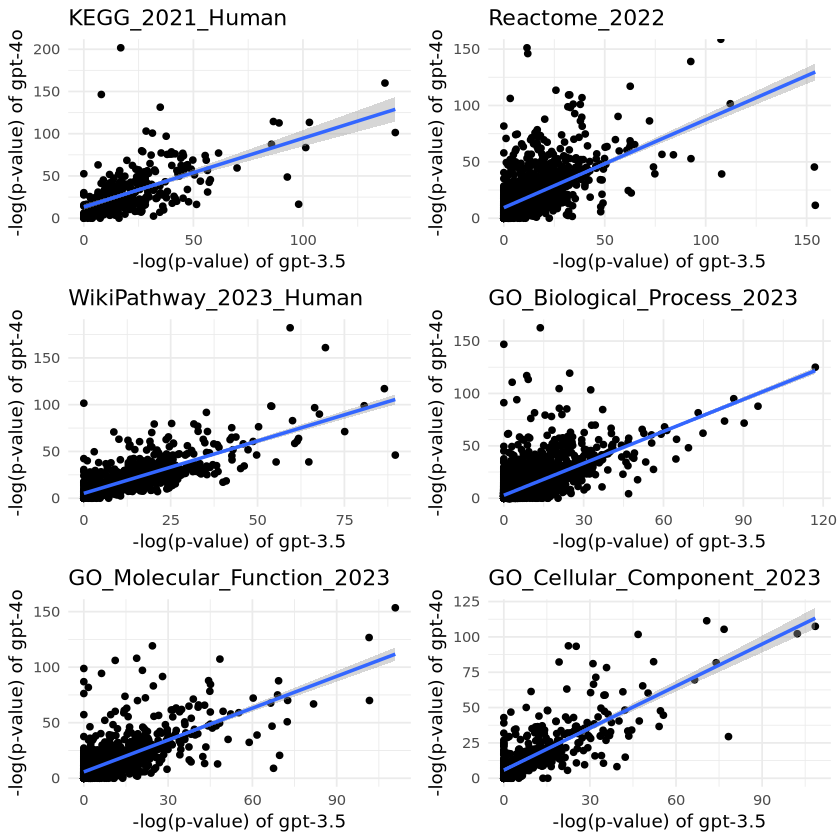

In [189]:
# Filter data for unique models
model1 <- df %>% filter(model == "gpt-3.5-turbo-0125")
model2 <- df %>% filter(model == "gpt-4o-2024-05-13")

# Initialize an empty list to store plots
plots <- list()

# For each database, plot log_p of gpt-3.5-turbo-0125 against log_p of gpt-4o-2024-05-13
databases <- unique(df$database)
for(d in databases){
  df1 <- model1 %>% filter(database ==d)
  df2 <- model2 %>% filter(database ==d)
  joined_df <- merge(df1, df2, by = c("descr"), suffixes = c("_1", "_2"))
  
  plots[[d]] <- ggplot(joined_df, aes(x = log_p_1, y = log_p_2)) +
    geom_point() +
    geom_smooth(method = "lm") +
    labs(title = d,
         x = "-log(p-value) of gpt-3.5", 
         y = "-log(p-value) of gpt-4o") +
    theme_minimal()
}

# Combine all plots into a single faceted plot
library(gridExtra)
combined_plot <- do.call(gridExtra::grid.arrange, c(plots, ncol = 2))

# Save the plot
ggsave(filename = "figures/5_scatter_plot_logp_compare_models.pdf", plot = combined_plot, device = "pdf", width = 10, height = 10, dpi = 300)
